In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import plotly.graph_objects as go

%matplotlib inline

In [32]:
shoes = pd.read_csv("shoe_data.csv")

In [33]:
shoes['sale_price'] = shoes['sale_price'].replace({'\$': '', ',': ''}, regex=True) #drops the dollar sign and commas
shoes['retail_price'] = shoes['retail_price'].replace({'\$': '', ',': ''}, regex=True) #drops the dollar sign and commas
shoes = shoes.astype({"sale_price": float, "retail_price": float}) #converts sale_price and retail_price into float 
shoes['difference'] = shoes['sale_price'] - shoes['retail_price'] #profit margin for each sale 
shoes['order_date'] = pd.to_datetime(shoes.order_date)
shoes['sale_month'] = shoes['order_date'].dt.strftime('%m/%y') #we're gonna get sale_month (and year) to use later in our graph
shoes['order_date'] = shoes['order_date'].dt.strftime('%Y-%m-%d') #turns our order_date into nicer format


In [34]:
shoes['avg_profit'] = 0
array = shoes.sale_month.unique()

for x in array:
    shoes.loc[shoes.sale_month == x, 'avg_profit'] = shoes[shoes['sale_month'] == x]['difference'].mean()

#shoes.loc[shoes.sale_month == '09/17', 'avg_profit'] = shoes[shoes['sale_month'] == '09/17']['difference'].mean()
shoes_final = shoes[['brand', 'sale_month', 'avg_profit']]
shoes_final['brand'] = 'Overall'
shoes_final = shoes_final.drop_duplicates()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
yeezy = shoes[shoes['brand'].str.strip() == 'Yeezy']
for x in array:
    yeezy.loc[yeezy.sale_month == x, 'avg_profit'] = yeezy[yeezy['sale_month'] == x]['difference'].mean()
    
yeezy_final = yeezy[['brand','sale_month','avg_profit']]
yeezy_final = yeezy_final.drop_duplicates()

In [36]:
offwhite = shoes[shoes['brand'].str.strip() == 'Off-White']
for x in array:
    offwhite.loc[offwhite.sale_month == x, 'avg_profit'] = offwhite[offwhite['sale_month'] == x]['difference'].mean()
    
offwhite_final = offwhite[['brand', 'sale_month', 'avg_profit']]
offwhite_final = offwhite_final.drop_duplicates()

graph_data = pd.concat([offwhite_final, shoes_final, yeezy_final])
graph_data['plot_order'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


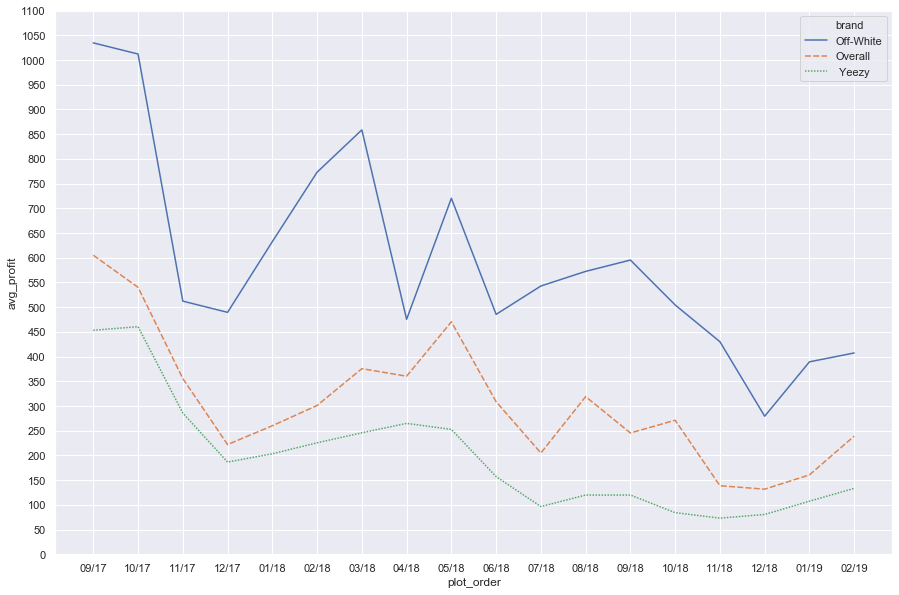

In [37]:
x_list = array.tolist()
x_list.insert(0,'0')

sns.set(style="darkgrid")
sns.mpl.rc("figure", figsize=(15,10))

plot = sns.lineplot(x='plot_order', y="avg_profit", hue="brand", style="brand", data=graph_data)
plot.set(ylim=(0, 1100))
plot.set_xticklabels(x_list)
plot.yaxis.set_major_locator(ticker.MultipleLocator(50))
plot.xaxis.set_major_locator(ticker.MultipleLocator(1))



In [38]:
us_state_abbrev = {
    'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL','Georgia': 'GA', 'Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN', 'Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE', 'Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC', 'North Dakota': 'ND', 'Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Palau': 'PW','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY',
}


In [40]:
array2 = shoes.buyer_region.unique()
mapframe = shoes[shoes['brand'].str.strip() == 'Yeezy']
for x in array2:
    mapframe.loc[mapframe.buyer_region == x, 'avg_profit'] = mapframe[mapframe['buyer_region'] == x]['difference'].mean()
    mapframe.loc[mapframe.buyer_region == x, 'units_sold'] = mapframe[mapframe['buyer_region'] == x]['difference'].count()
mapframe = mapframe[['buyer_region','avg_profit','units_sold']]
mapframe = mapframe.astype({"units_sold": int})
mapframe['abbrev'] = mapframe['buyer_region'].map(us_state_abbrev)

mapframe = mapframe.drop_duplicates()
#mapframe.sort_values(by='avg_profit', ascending=False)
mapframe


,buyer_region,avg_profit,units_sold,abbrev
0,California,153.978037,13113,CA
3,Kentucky,181.979849,397,KY
4,Rhode Island,128.034483,261,RI
5,Michigan,135.684473,2209,MI
7,New York,140.772370,12103,NY
8,Kansas,129.480000,275,KS
9,Florida,139.386708,4484,FL
10,New Jersey,137.604865,3371,NJ
11,Texas,130.003367,4455,TX
16,North Carolina,124.374749,998,NC


In [49]:

fig = go.Figure(data=go.Choropleth(
    locations=mapframe['abbrev'], # Spatial coordinates
    z = mapframe['avg_profit'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    colorbar_title = "Average Profit"
))

fig.update_layout(
    title_text = 'Profits by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [28]:
mapframe

,buyer_region,avg_profit,units_sold
0,California,153.978037,13113
3,Kentucky,181.979849,397
4,Rhode Island,128.034483,261
5,Michigan,135.684473,2209
7,New York,140.772370,12103
8,Kansas,129.480000,275
9,Florida,139.386708,4484
10,New Jersey,137.604865,3371
11,Texas,130.003367,4455
16,North Carolina,124.374749,998
